<a href="https://colab.research.google.com/github/Maryam-Zubair/Data-Science/blob/main/6_02_Lab2St.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module 3 Lab 2

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split.

- Use the LinearRegression class to learn a regression model on this data.

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
bike = pd.read_csv('/content/bike_day_raw.csv')

In [ ]:
bike.shape

(731, 11)

In [ ]:
bike.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bike.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [ ]:
X = bike.drop('cnt', axis=1)

In [ ]:
y=bike.cnt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.51438999790352
0.5585806017691204


In [ ]:
bike.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bike['season']= bike['season'].astype(str)

In [ ]:
dt={
    'season': str,
    'mnth': str,
    'holiday': str,
    'weekday': str,
    'workingday': str,
    'weathersit': str
}

bike = bike.astype(dt)


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   mnth        731 non-null    object 
 2   holiday     731 non-null    object 
 3   weekday     731 non-null    object 
 4   workingday  731 non-null    object 
 5   weathersit  731 non-null    object 
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 62.9+ KB


In [ ]:
categorical = X.dtypes==object
numerical = ~categorical

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
numerical_transformer = Pipeline(steps = [('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer(transformers = [('num', numerical_transformer, numerical), ('cat', categorical_transformer, categorical)])

In [ ]:
lr2 = LinearRegression()
rr1 = Ridge(alpha=1
            )
mymodel = Pipeline(steps=[('prep', ct), ('ridge', rr1)])

In [ ]:
mymodel.fit(X_train, y_train)
print(mymodel.score(X_train, y_train))
print(mymodel.score(X_test, y_test))

0.5143628267375319
0.5592208333841484


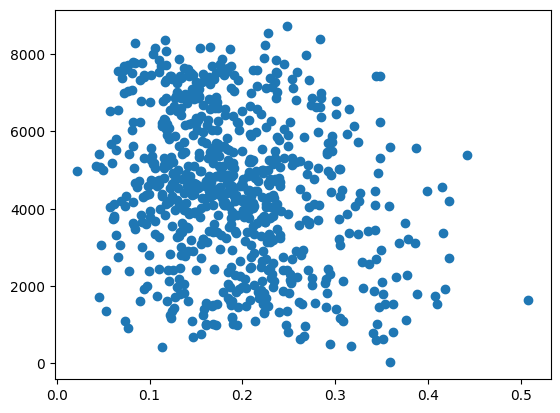

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X['windspeed'], y)

2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression,
- Apply Ridge and do grid search
- Apply Lasso and do grid search
- Visualize the coefficients.
